In [1]:
import pandas as pd
#加载数据
train = pd.read_csv('./train.csv')
print(train.head())

   ID          Datetime  Count
0   0  25-08-2012 00:00      8
1   1  25-08-2012 01:00      2
2   2  25-08-2012 02:00      6
3   3  25-08-2012 03:00      2
4   4  25-08-2012 04:00      2


In [2]:
#转换为pandas中的日期格式
train['Datetime'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train.Datetime
print(train.head())

                     ID            Datetime  Count
Datetime                                          
2012-08-25 00:00:00   0 2012-08-25 00:00:00      8
2012-08-25 01:00:00   1 2012-08-25 01:00:00      2
2012-08-25 02:00:00   2 2012-08-25 02:00:00      6
2012-08-25 03:00:00   3 2012-08-25 03:00:00      2
2012-08-25 04:00:00   4 2012-08-25 04:00:00      2


In [3]:
#去掉ID,Datetime字段
train.drop(['ID', 'Datetime'], axis=1, inplace=True)
print(train.head())

                     Count
Datetime                  
2012-08-25 00:00:00      8
2012-08-25 01:00:00      2
2012-08-25 02:00:00      6
2012-08-25 03:00:00      2
2012-08-25 04:00:00      2


In [4]:
#按照天 进行采样
daily_train = train.resample('D').sum()
print(daily_train.head())
daily_train['ds'] = daily_train.index
daily_train['y'] = daily_train.Count
daily_train.drop(['Count'], axis=1, inplace=True)
print(daily_train.head())

            Count
Datetime         
2012-08-25     76
2012-08-26     88
2012-08-27     62
2012-08-28     58
2012-08-29     60
                   ds   y
Datetime                 
2012-08-25 2012-08-25  76
2012-08-26 2012-08-26  88
2012-08-27 2012-08-27  62
2012-08-28 2012-08-28  58
2012-08-29 2012-08-29  60


In [5]:
from fbprophet import Prophet
#拟合prophet模型
m = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.1)
m.fit(daily_train)
#预测未来7个月213天
future = m.make_future_dataframe(periods=213)
forecast = m.predict(future)
print(forecast)

Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2012-08-25   -676.297540  -2296.006038     60.219823   -676.297540   
1   2012-08-26   -668.240913  -2395.218500    -13.836324   -668.240913   
2   2012-08-27   -660.184285   -808.115989   1514.522988   -660.184285   
3   2012-08-28   -652.127658   -671.438060   1676.878766   -652.127658   
4   2012-08-29   -644.071030   -764.725219   1710.407023   -644.071030   
..         ...           ...           ...           ...           ...   
970 2015-04-22  16245.487133  15355.186156  17855.984275  15871.442784   
971 2015-04-23  16272.994571  15111.971603  17603.815768  15894.945600   
972 2015-04-24  16300.502009  14831.433490  17349.450650  15919.628756   
973 2015-04-25  16328.009446  13604.948128  16138.829742  15943.834130   
974 2015-04-26  16355.516884  13541.599614  15991.345447  15967.655403   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     -676.297540     -422.881

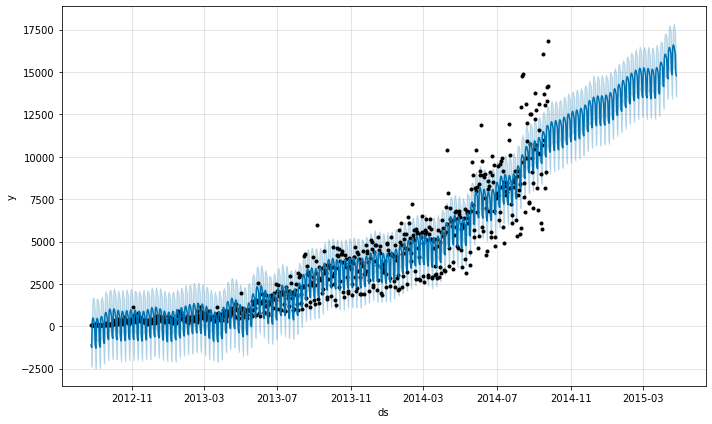

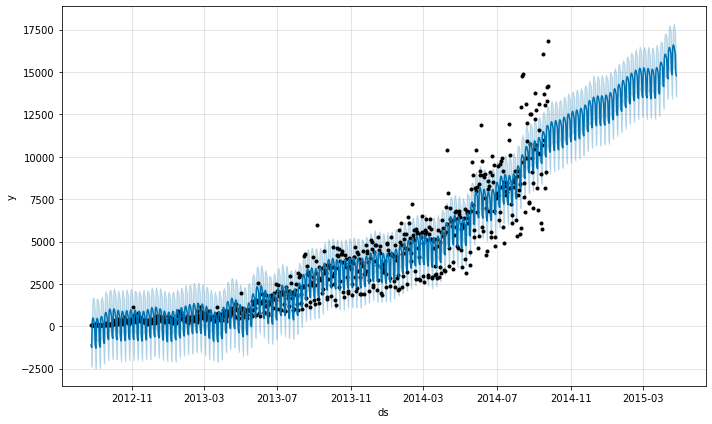

In [6]:
m.plot(forecast)

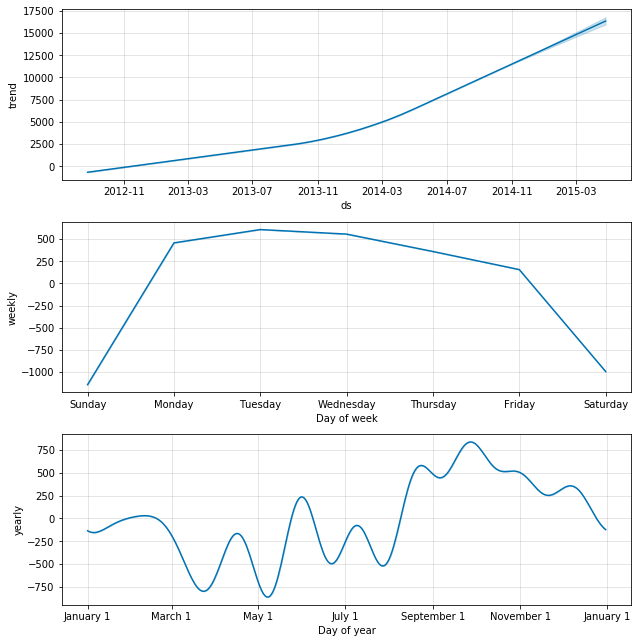

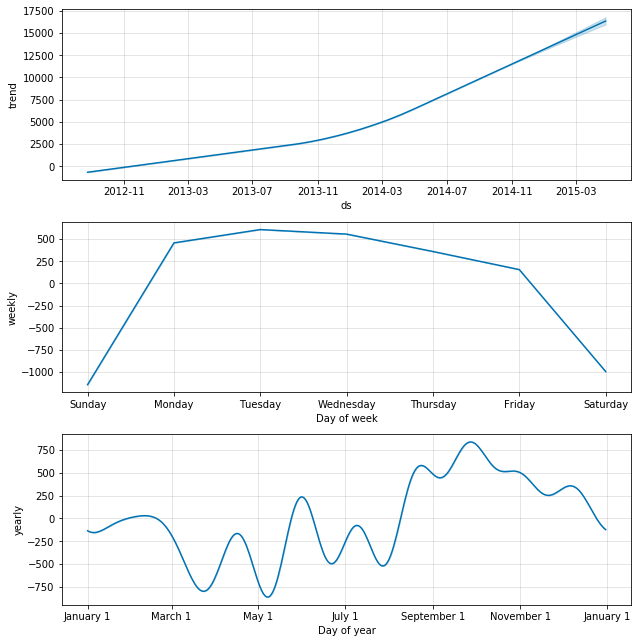

In [7]:
#查看成分
m.plot_components(forecast)